In [24]:


import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [27]:
#data_day= pd.read_csv("/Users/ghaidaa/Desktop/Bike_sharing/day.csv")
data=pd.read_csv("/Users/ghaidaa/Desktop/Bike_sharing/hour.csv")

In [36]:
data.columns



Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
data.duplicated().sum()

0

In [16]:
data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
144,145,2011-05-25,2,0,5,0,3,1,1,0.660833,0.615542,0.696250,0.154233,740,4238,4978
355,356,2011-12-22,1,0,12,0,4,1,2,0.423333,0.426121,0.757500,0.047275,227,2841,3068
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
83,84,2011-03-25,2,0,3,0,5,1,1,0.264167,0.256312,0.495000,0.230725,300,1910,2210
339,340,2011-12-06,4,0,12,0,2,1,3,0.462500,0.456400,0.949583,0.232583,126,2468,2594


In [17]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-12-25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [18]:
data.dteday.unique()

array(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
       '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
       '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
       '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
       '2011-01-17', '2011-01-18', '2011-01-19', '2011-01-20',
       '2011-01-21', '2011-01-22', '2011-01-23', '2011-01-24',
       '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28',
       '2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
       '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
       '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09',
       '2011-02-10', '2011-02-11', '2011-02-12', '2011-02-13',
       '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17',
       '2011-02-18', '2011-02-19', '2011-02-20', '2011-02-21',
       '2011-02-22', '2011-02-23', '2011-02-24', '2011-02-25',
       '2011-02-26', '2011-02-27', '2011-02-28', '2011-03-01',
       '2011-03-02', '2011-03-03', '2011-03-04', '2011-

In [19]:
data.season.unique()

array([1, 2, 3, 4])

In [37]:
data.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [20]:
data.yr.unique()

array([0, 1])

In [38]:
data.yr.value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [30]:
data.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [39]:
data.weekday.value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [33]:
data.holiday.unique()

array([0, 1])

In [41]:
data.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [42]:
data.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [32]:
data.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
 ##drop the 'casual' and 'registered' columns
#df.drop(['casual', 'registered'], axis=1, inplace=True)
 
### Remove the instant column
#We will also remove the `instant` from our model since is not an explanatory variable.

<AxesSubplot:>

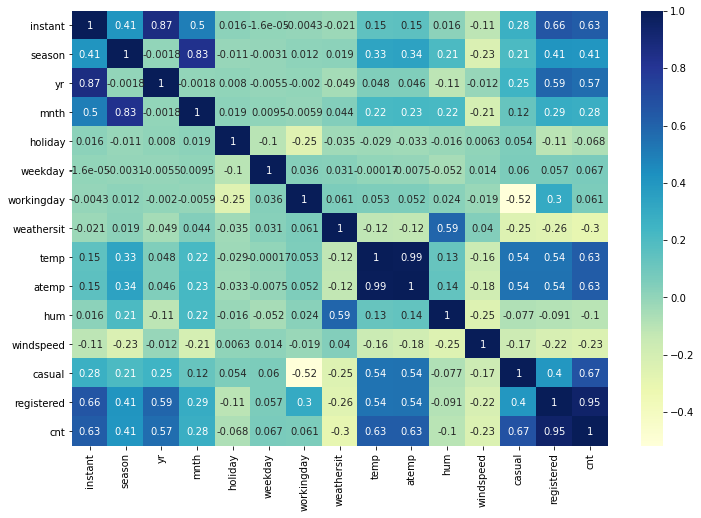

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")